## Variation 1: Multiple Seborn Histplots Graphed on One Figure

### _Create multiple color palettes by region and graph one region at a time._


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/familiesBySize.csv",
                 index_col=0).round(2)
chart_title = "Families by Size"
num_cats = len(df)
cats = list(df.index)
cats.reverse()
cat_name = df.index.name

# Convert values to percent of column
df = df/df[df.columns].sum().round(2)*100
df = pd.melt(df.reset_index(),
             id_vars=[cat_name],
             var_name="Location",
             value_vars=df.columns, value_name="values")

df["values"] = pd.to_numeric(df["values"])
df.head()

,Categories,Location,values
0,2 persons,Denman,76.404494
1,3 persons,Denman,13.483146
2,4 persons,Denman,6.741573
3,5 or more persons,Denman,3.370787
4,2 persons,Hornby,73.529412


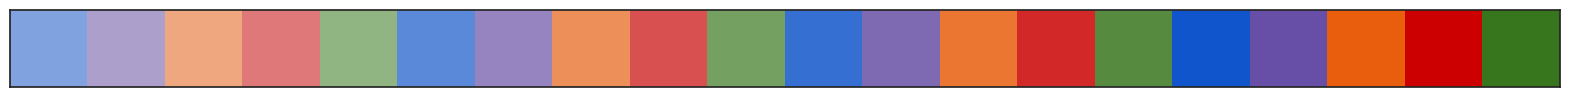

In [17]:
# Set Seaborn plot style: white in the background, no grid lines
sns.set_theme(style="white")

# Set this equal to the number of categories + 3
# This is the number of *evenly spaced* colors to generate/choose from the sns palettes.
# I add three here, because the first three shades are too light in sns.light_palette.
buckets = num_cats + 3

# assigning regions to color palettes
denman = sns.color_palette(sns.light_palette(
    '#1155CC', buckets, input='hex')[3:]).as_hex()
hornby = sns.color_palette(sns.light_palette(
    '#674EA7', buckets, input='hex')[3:]).as_hex()
cv = sns.color_palette(sns.light_palette(
    '#E95E0D', buckets, input='hex')[3:]).as_hex()
bc = sns.color_palette(sns.light_palette(
    '#CC0000', buckets, input='hex')[3:]).as_hex()
canada = sns.color_palette(sns.light_palette(
    '#38761D', buckets, input='hex')[3:]).as_hex()

# Transposing/stacking colors to create incremented palette
colors = [item for item in zip(denman, hornby, cv, bc, canada)]
regions = [element for item in colors for element in item]

sns.palplot(regions)

RangeIndex(start=0, stop=20, step=1)


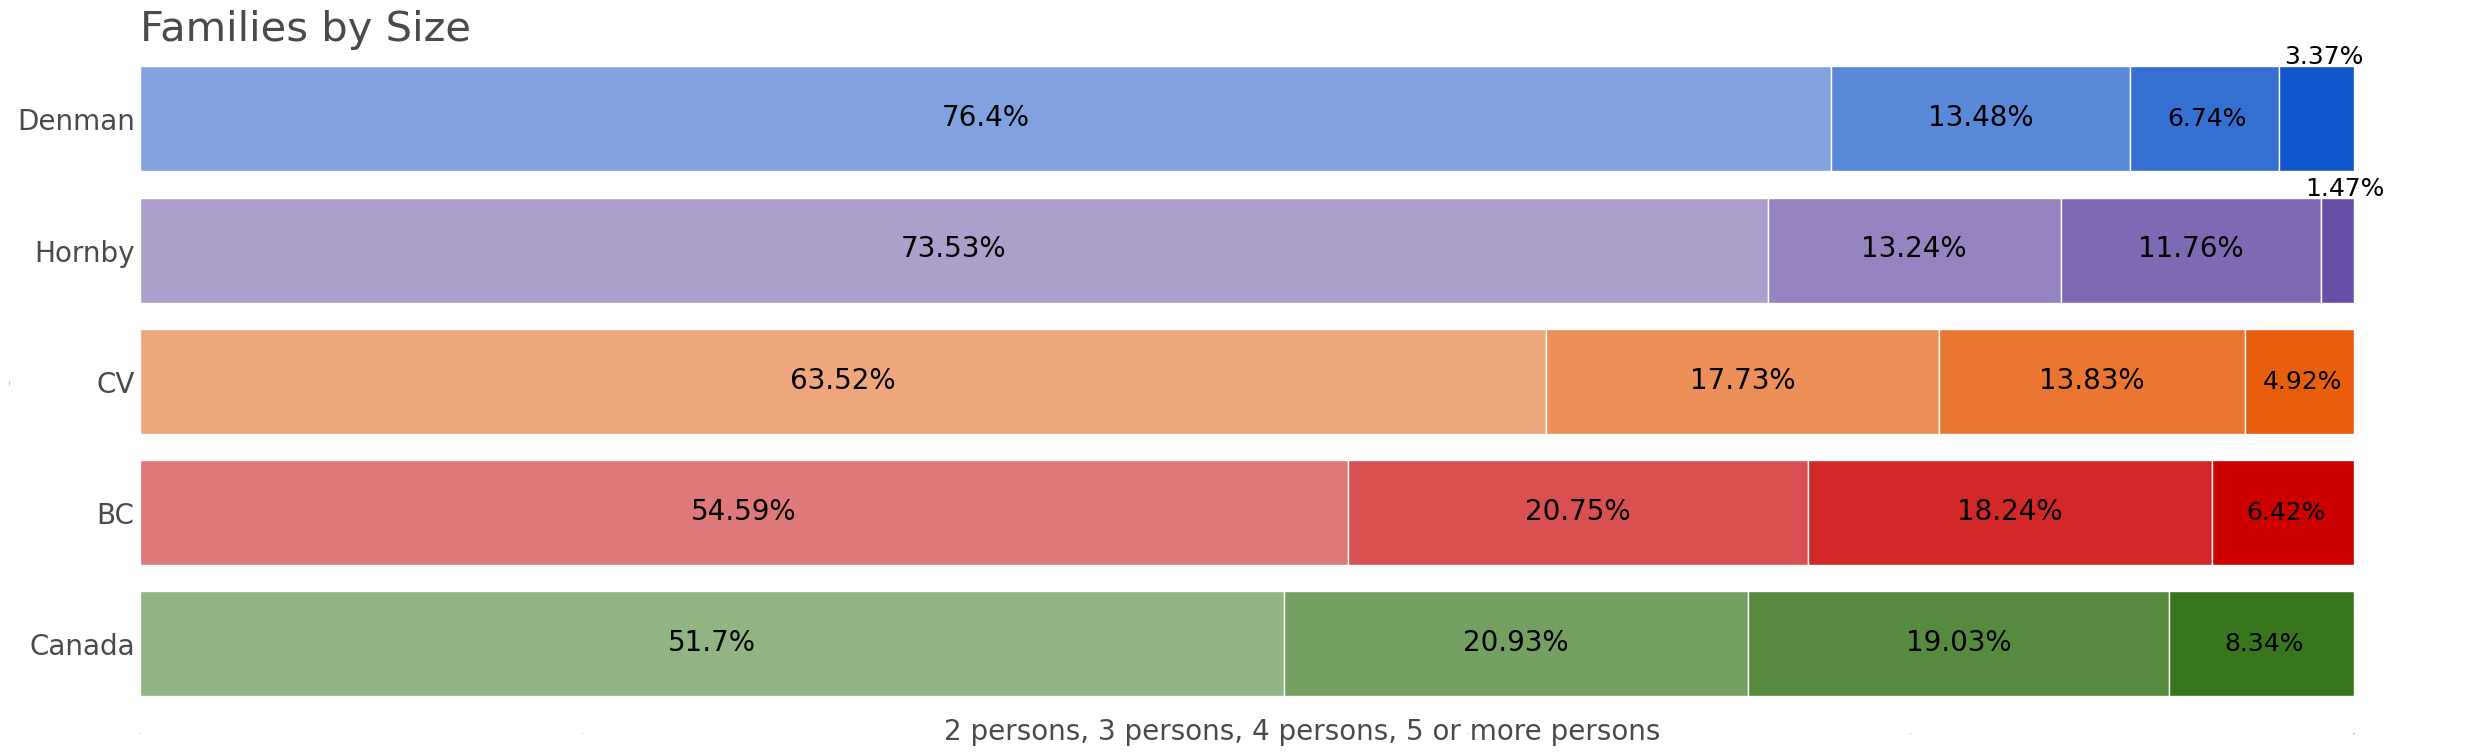

In [18]:

# Setting figure and axis with subplots
figure, axis = plt.subplots(figsize=(30, 9))
# axis.xaxis.tick_bottom()
axis.tick_params(axis='y', length=0, labelsize=20,
                 labeltop=True, colors="#4A4A4A")
axis.tick_params(axis='x', length=0, labelsize=0)

# Ages labels
labels = ", ".join(cats[::-1])

axis.set_xlabel(labels, loc='center',
                fontsize=20, color="#4A4A4A", labelpad=-12)
axis.xaxis.set_label_position("bottom")

# Location labels
axis.set_ylabel("Location", size=0)

# Remove plot outline ("spine")
plt.box(False)

print(df.index.unique())
# Setting histogram parameters
hue_order = cats
hue = cat_name
y = "Location"
weights = "values"
multiple = "stack"
element = "bars"
# shrink = .4  # Skinny
shrink = .8  # Regular

# Plot histogram of entire dataframe with weights
myplot = sns.histplot(df.reset_index(drop=True),
                      y=y,
                      weights=weights,
                      hue=hue,
                      hue_order=hue_order,
                      palette=sns.color_palette("flare", num_cats),
                      multiple=multiple,
                      element=element,
                      shrink=shrink,
                      discrete=True,
                      legend=False)


plt.title(chart_title, fontsize=30,
          color="#4A4A4A", loc="left", y=.98)
# Now, iterate back through all sections in the figure & reassign colors based on regions color palette
for area, color in zip(axis.patches, regions):
    area.set_facecolor(color)

for bar in axis.patches:
    if bar.get_width() < 4:
        axis.text(bar.get_x() + bar.get_width()/2 + .35,
                  # bar.get_height()+bar.get_y() - 0.12,  # skinny
                  bar.get_height()+bar.get_y()-.82,  # regular
                  f"{round(bar.get_width(), 2)}%",
                  ha="center",
                  color="black",
                  size=18,
                  )
    elif bar.get_width() < 9.5:
        axis.text(bar.get_x() + bar.get_width()/2+.13,
                  # bar.get_height()+bar.get_y() - 0.12,  # skinny
                  bar.get_height()+bar.get_y()-.35,  # regular
                  f"{round(bar.get_width(), 2)}%",
                  ha="center",
                  color="black",
                  size=18,
                  )
    else:
        axis.text(bar.get_x() + bar.get_width()/2,
                  # bar.get_height()+bar.get_y() - 0.12,  # skinny
                  bar.get_height()+bar.get_y()-.35,  # regular
                  f"{round(bar.get_width(), 2)}%",
                  ha="center",
                  color="black",
                  size=20)

In [19]:
""" 
df = pd.read_csv("data/incomeSource.csv",
                 index_col=0).mul(100).round(2)
chart_title = "Source of Income by Gender"


small = df.iloc[:6]
num_cats = len(small)
cats = list(small.index)
cats.reverse()
cat_name = small.index.name
small = pd.melt(small.reset_index(),
             id_vars=[cat_name],
             var_name="Location",
             value_vars=df.columns, value_name="values")
small["values"] = pd.to_numeric(small["values"])
print(cat_name)
print(small.head(10))

# Setting figure and axis with subplots
figure, axis = plt.subplots(figsize=(15, 9))
axis.xaxis.tick_bottom()
axis.tick_params(axis='y', length=0, labelsize=20,
                 labeltop=True, colors="#4A4A4A")
axis.tick_params(axis='x', length=0, labelsize=0)

# Ages labels
labels = ", ".join(cats)
axis.set_xlabel(labels, loc='center',
                fontsize=20, color="#4A4A4A", labelpad=-12)
axis.xaxis.set_label_position("bottom")

# Location labels
axis.set_ylabel("Location", size=0)

# Remove plot outline ("spine")
plt.box(False)

print(small.index.unique())
# Setting histogram parameters
hue_order = cats
hue = cat_name
y = "Location"
weights = "values"
multiple = "stack"
element = "bars"
shrink = .8

# Plot histogram of entire dataframe with weights
myplot = sns.histplot(small.reset_index(drop=True),
                      y=y,
                      weights=weights,
                      hue=hue,
                      hue_order=hue_order,
                      palette=sns.color_palette("flare", 3),
                      multiple=multiple,
                      element=element,
                      shrink=shrink,
                      discrete=True,
                      legend=False)

plt.title(chart_title, fontsize=30,
          color="#4A4A4A", loc="left", y=.98)
# Now, iterate back through all sections in the figure & reassign colors based on regions color palette
for area, color in zip(axis.patches, regions):
    area.set_facecolor(color)

for bar in axis.patches:
    if bar.get_width() < 8:
        axis.text(bar.get_x() + bar.get_width()/2+.25,
                  bar.get_height()+bar.get_y()-.25,
                  f"{round(bar.get_width(), 2)}%",
                  ha="center",
                  color="white",
                  size=15, rotation=90)
    else:
        axis.text(bar.get_x() + bar.get_width()/2,
                  bar.get_height()+bar.get_y()-.35,
                  f"{round(bar.get_width(), 2)}%",
                  ha="center",
                  color="black",
                  size=20) """

' \ndf = pd.read_csv("data/incomeSource.csv",\n                 index_col=0).mul(100).round(2)\nchart_title = "Source of Income by Gender"\n\n\nsmall = df.iloc[:6]\nnum_cats = len(small)\ncats = list(small.index)\ncats.reverse()\ncat_name = small.index.name\nsmall = pd.melt(small.reset_index(),\n             id_vars=[cat_name],\n             var_name="Location",\n             value_vars=df.columns, value_name="values")\nsmall["values"] = pd.to_numeric(small["values"])\nprint(cat_name)\nprint(small.head(10))\n\n# Setting figure and axis with subplots\nfigure, axis = plt.subplots(figsize=(15, 9))\naxis.xaxis.tick_bottom()\naxis.tick_params(axis=\'y\', length=0, labelsize=20,\n                 labeltop=True, colors="#4A4A4A")\naxis.tick_params(axis=\'x\', length=0, labelsize=0)\n\n# Ages labels\nlabels = ", ".join(cats)\naxis.set_xlabel(labels, loc=\'center\',\n                fontsize=20, color="#4A4A4A", labelpad=-12)\naxis.xaxis.set_label_position("bottom")\n\n# Location labels\naxis.s